## Technical Indicator Analysis for Multiple Stocks

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib
from pathlib import Path

In [3]:
data_dir = Path("../Data/yfinance_data")
ticker_files = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']  # file names
logical_tickers = ['AAPL', 'AMZN', 'GOOGL', 'FB', 'MSF', 'NVDA', 'TSLA']  # labels for plots

In [4]:
def load_stock_data(tickers, data_dir):
    stock_data = {}
    for ticker in tickers:
        df = pd.read_csv(data_dir / f"{ticker}_historical_data.csv", parse_dates=['Date'])
        df.sort_values('Date', inplace=True)
        df.set_index('Date', inplace=True)
        stock_data[ticker] = df
    return stock_data


def apply_technical_indicators(df):
    df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
    macd, macdsignal, _ = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    df['MACD'] = macd
    df['MACD_Signal'] = macdsignal
    return df


def plot_indicators(df, ticker):
    plt.figure(figsize=(16, 10))

    # Plot Close Price and SMA
    plt.subplot(3, 1, 1)
    plt.plot(df.index, df['Close'], label='Close')
    plt.plot(df.index, df['SMA_20'], label='SMA 20', linestyle='--')
    plt.title(f"{ticker} - Close Price & SMA")
    plt.legend()

    # Plot RSI
    plt.subplot(3, 1, 2)
    plt.plot(df.index, df['RSI'], label='RSI', color='purple')
    plt.axhline(70, linestyle='--', color='red')
    plt.axhline(30, linestyle='--', color='green')
    plt.title(f"{ticker} - RSI")
    plt.legend()

    # Plot MACD
    plt.subplot(3, 1, 3)
    plt.plot(df.index, df['MACD'], label='MACD', color='blue')
    plt.plot(df.index, df['MACD_Signal'], label='Signal', color='orange')
    plt.title(f"{ticker} - MACD")
    plt.legend()

    plt.tight_layout()
    plt.show()

In [5]:
stock_data = load_stock_data(ticker_files, data_dir)
for ticker in ticker_files:
    stock_data[ticker] = apply_technical_indicators(stock_data[ticker])

### Apple

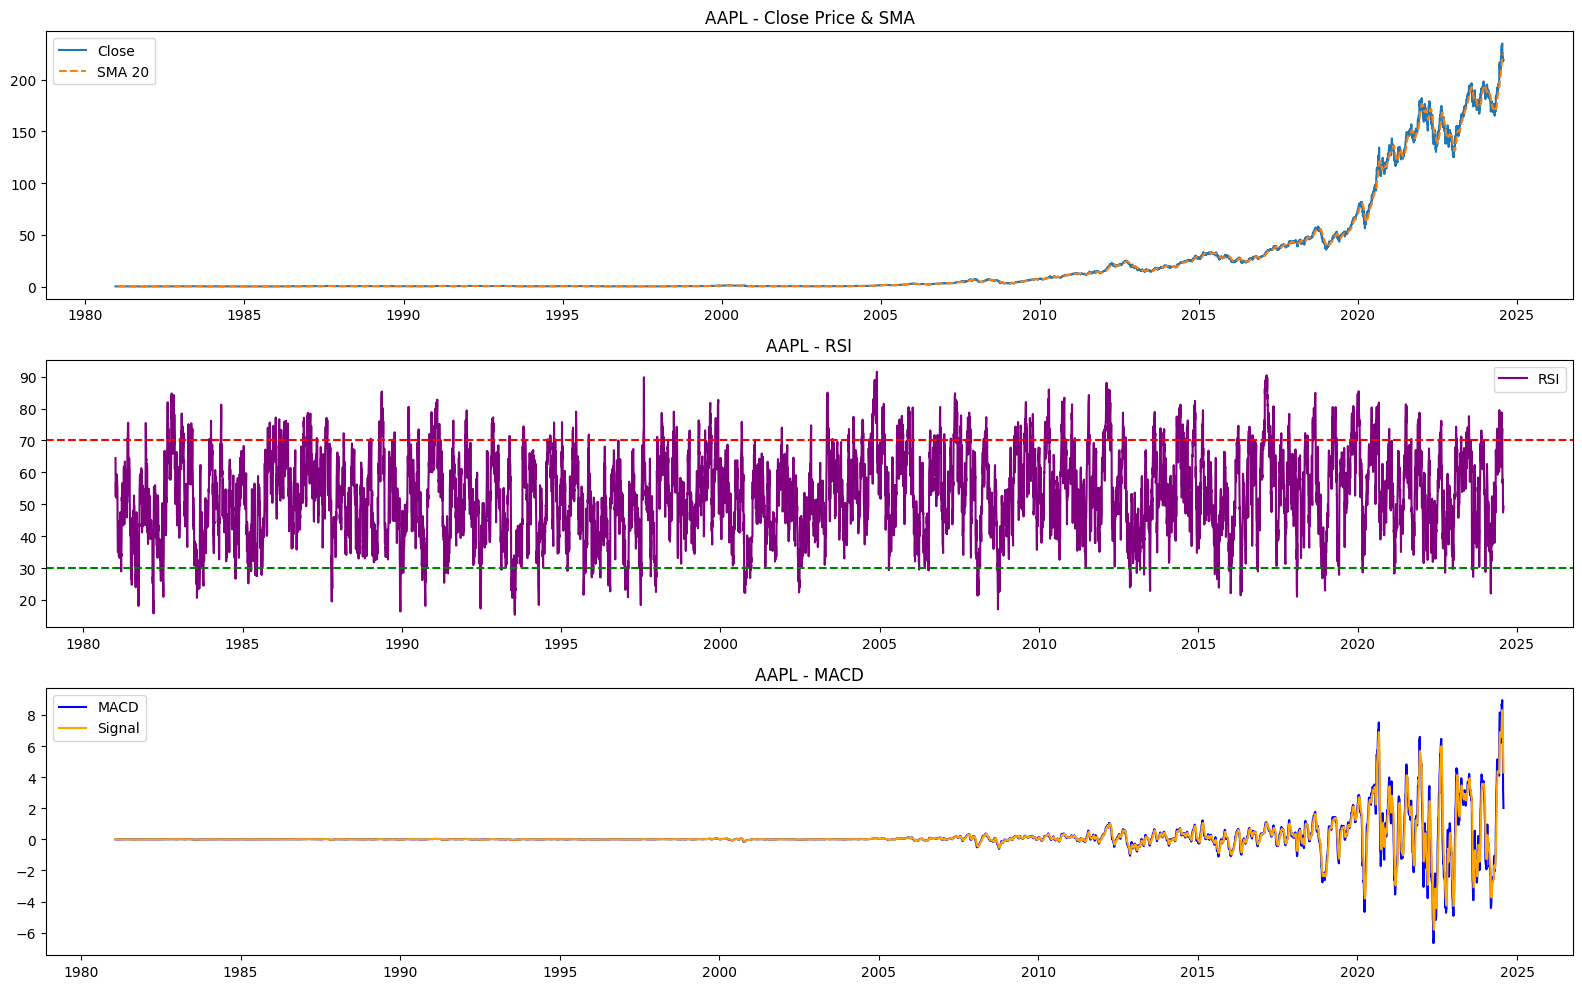

In [6]:
plot_indicators(stock_data['AAPL'], 'AAPL')

## Meta

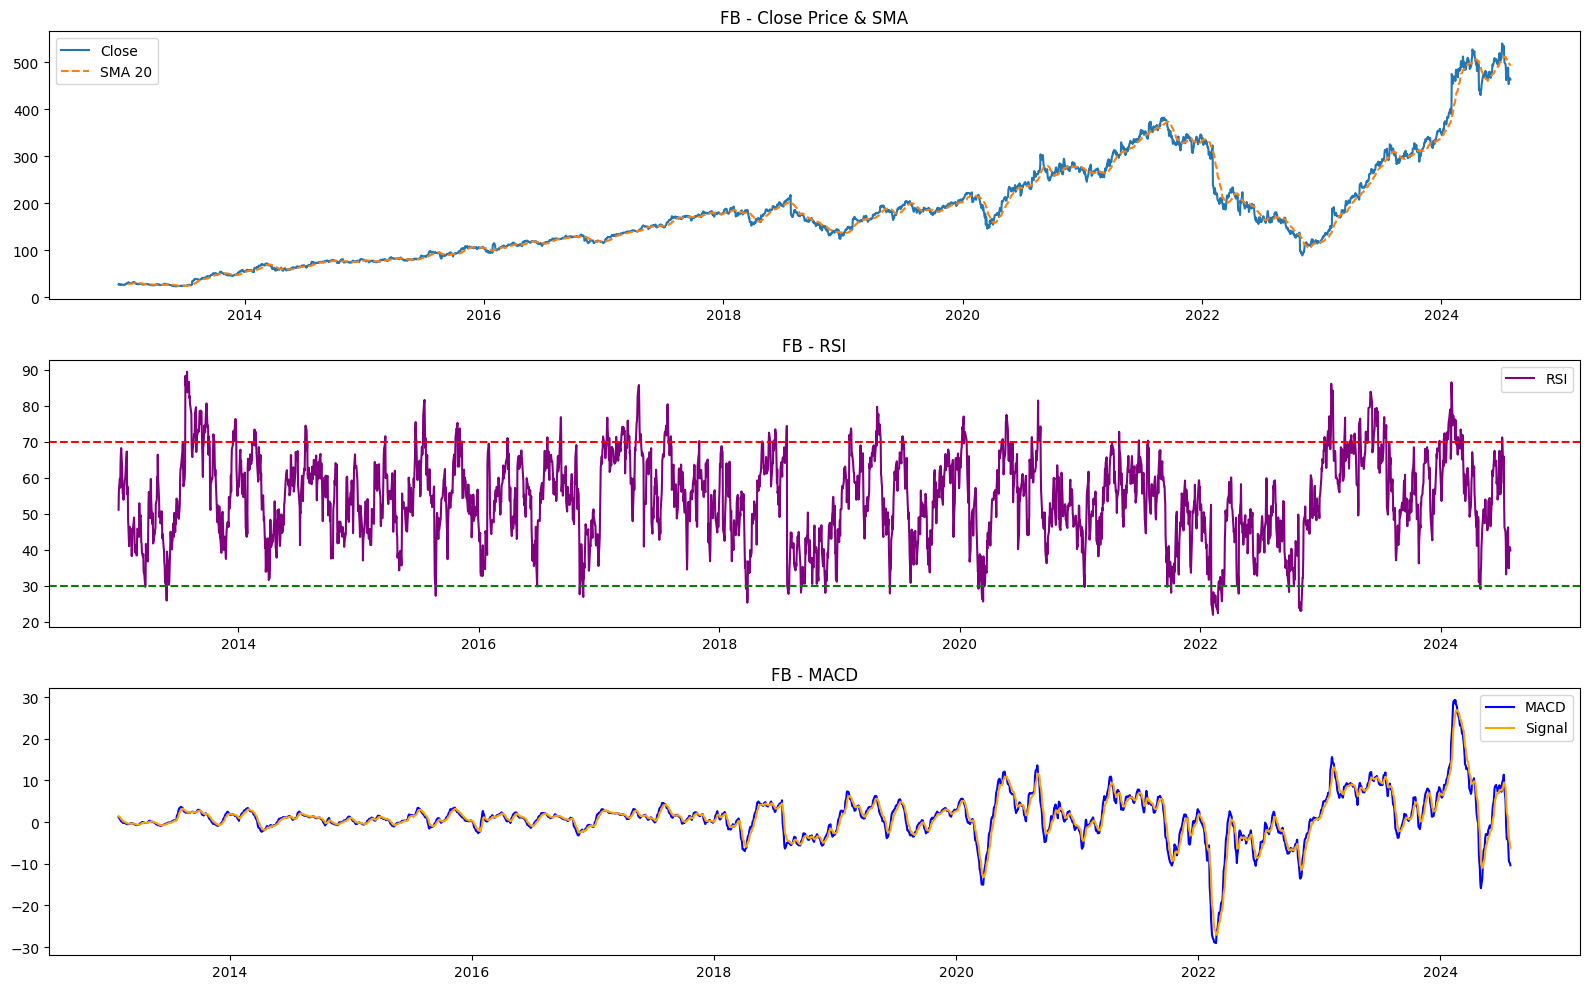

In [8]:
plot_indicators(stock_data['META'], 'FB')

### Microsoft

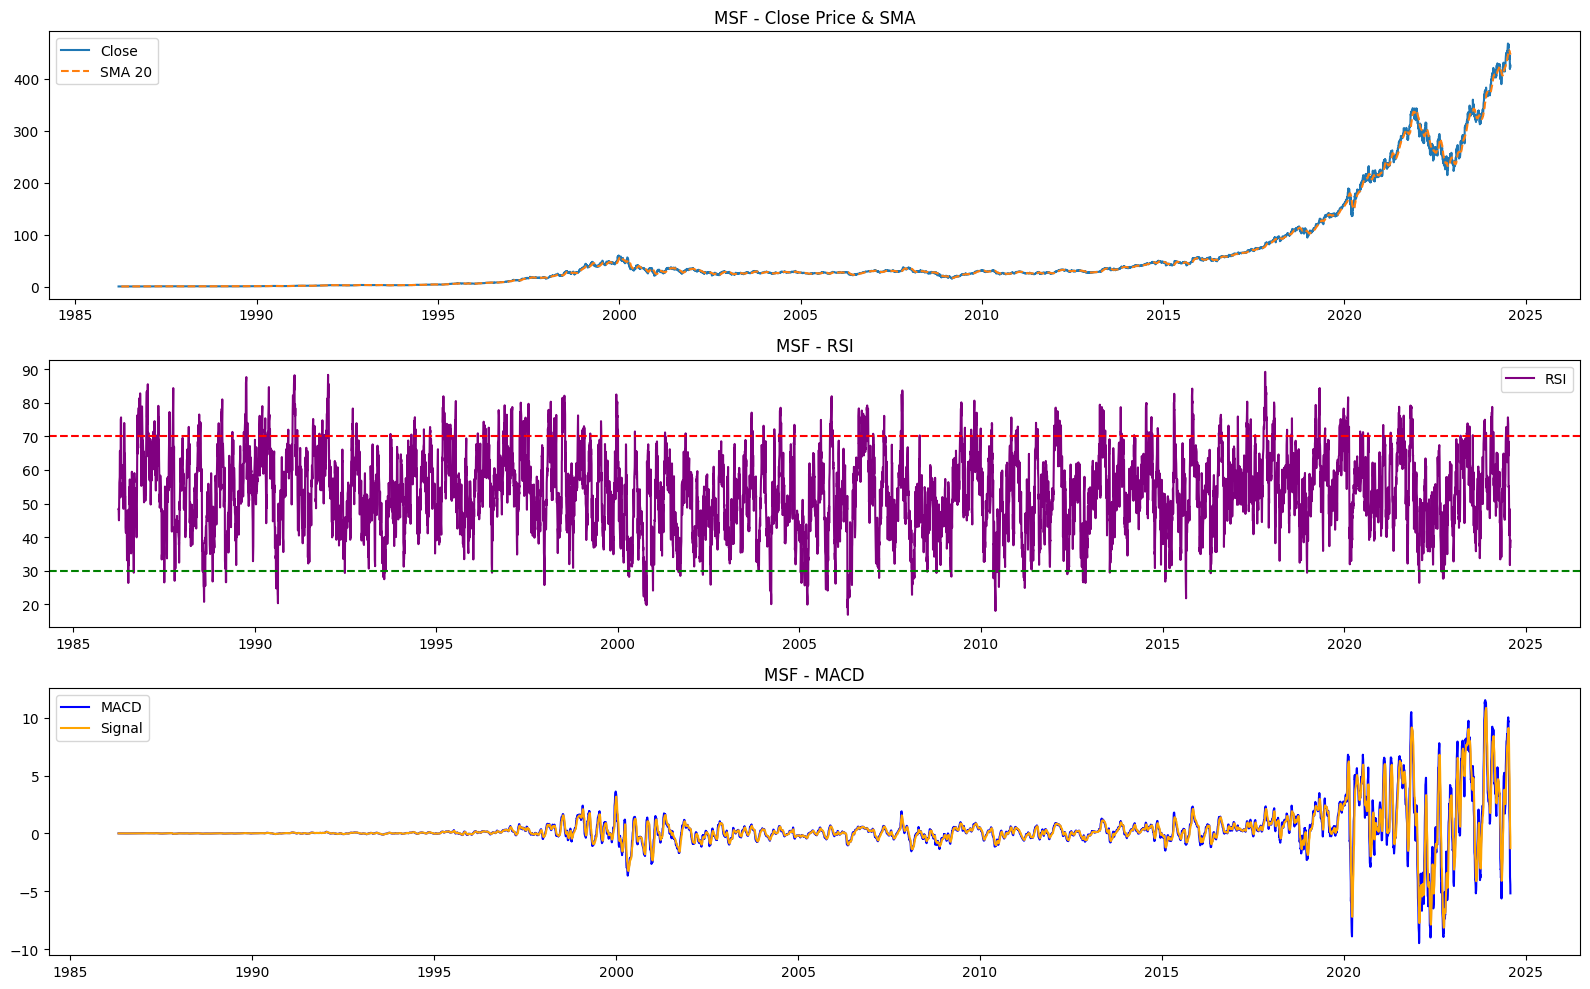

In [9]:
plot_indicators(stock_data['MSFT'], 'MSF')

We can see that for most of the stocks, the RSI is above 70, indicating that they are overbought. The MACD is also showing a bullish trend for all three stocks, with the MACD line above the signal line. The Bollinger Bands indicate that the stocks are trading near the upper band, suggesting that they may be overbought as well. Close prices also increase significantly over the period, indicating a strong upward trend.